<center>
<h2>Capstone Project</h2>

# <span style='color: #81A5FF; '> 😋 Exploratory Client Data Analysis and Normalization </span>

<h3> Group 4 </h3>

<span style='color: #081F4F; font-size: 18px;'>2023/2024</span>
</center>


---------

The present notebook refers to the section of exploring the simulated client-centred data and prepare according to certain assumptions to be further used within the Flavour Flix platform. Essentially, the key procedures followed throughout this section are:

<span style = 'font-size: 18px;'>
🍽 ;  <br>
🍽 ;<br>
🍽 ; <br>
🍽 ;<br>
🍽 ;<br>
🍽 ;<br>
🍽 .<br>
</span>


-------

### 1. Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions.utils import *
#from functions.env_colors import *
from functions.location import *
from functions.menus import *
from functions.preprocessement import *
from functions.restaurants import *

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
client_data = pd.read_csv('data/clientData.csv', sep=',', index_col='id')

In [3]:
client_data

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,travel_car,smoker,...,allergies,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,price_range,cuisine_type,lunch_hour,dinner_hour
id,,,,,,,,,,,,,,,,,,,,,
1,Örjan,Douberday,wdouberday0@google.com.br,Male,mdouberday0,17/12/1961,Portuguese,Setúbal,False,False,...,none,arroz de pato,sopa de tomate,mindful,MBWay,familiar,12.0,seafood,13:00 - 14:00,19:00 - 20:00
2,Céline,Milmo,lmilmo1@naver.com,Male,lmilmo1,02/11/1986,Portuguese,Setúbal,True,False,...,none,cheesecake,bitoque,mindful,Cash,after work,14.0,portuguese,13:00 - 14:00,21:00 - 22:00
3,Bérénice,McCaughey,jmccaughey2@blogs.com,Male,kmccaughey2,10/05/1991,Portuguese,Porto,True,False,...,none,pasta,arroz de pato,foodie,Credit Card,after work,11.0,mediterranean,12 :00 - 13:00,18 :00 - 19:00
4,Gaëlle,O'Hickey,gohickey3@biblegateway.com,Male,kohickey3,21/10/1974,Portuguese,Coimbra,False,True,...,none,filetes de pescada,ceviche,foodie,MBWay,after work,NaN,portuguese,13:00 - 14:00,20:00 - 21:00
5,Yáo,O'Sheilds,aosheilds4@pbs.org,Female,hosheilds4,05/01/1969,Portuguese,Leiria,False,False,...,none,tacos,salada de frutas,social,MBWay,homemade,19.0,meat cuisine,13:00 - 14:00,19:00 - 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Liè,De Vaar,adevaarrn@4shared.com,Female,ddevaarrn,23/06/1981,Portuguese,Aveiro,False,True,...,none,feijoada,coelho,social,Credit Card,after work,15.0,international,13:00 - 14:00,19:00 - 20:00
997,Vérane,Rayner,mraynerro@icio.us,Male,braynerro,06/04/1977,Portuguese,Castelo Branco,False,True,...,none,bacalhau a gomes de sa,pasta,social,MBWay,homemade,13.0,mediterranean,14:00 - 15:00,19:00 - 20:00
998,Jú,Boyd,rboydrp@github.com,Male,sboydrp,16/09/1970,Portuguese,Faro,True,True,...,none,pimentos,croissant,comfort,Credit Card,traditional,13.0,mediterranean,12 :00 - 13:00,19:00 - 20:00


### 2. Summary Statistics

In [4]:
client_data.describe()

,price_range
count,900.000000
mean,17.854444
std,4.595535
min,10.000000
25%,14.000000
50%,18.000000
75%,22.000000
max,25.000000


In [5]:
client_data.describe(include='object')

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,smoker,drinks_alcohol,dietary_restrictions,allergies,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,cuisine_type,lunch_hour,dinner_hour
count,1000,1000,1000,923,1000,1000,938,943,946,938,1000,1000,982,979,1000,968,1000,891,1000,1000
unique,224,994,1000,2,1000,964,14,19,2,2,3,11,56,29,5,9,25,21,4,4
top,Åsa,Paddemore,wdouberday0@google.com.br,Male,mdouberday0,28/01/1960,Portuguese,Lisbon,False,True,none,none,lasanha,lasanha,mindful,Credit Card,after work,portuguese,13:00 - 14:00,20:00 - 21:00
freq,11,2,1,467,1,3,836,88,498,482,634,899,40,63,217,439,431,330,505,505


In [6]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   first_name            1000 non-null   object 
 1   last_name             1000 non-null   object 
 2   email                 1000 non-null   object 
 3   gender                923 non-null    object 
 4   username              1000 non-null   object 
 5   date_of_birth         1000 non-null   object 
 6   nationality           938 non-null    object 
 7   city                  943 non-null    object 
 8   travel_car            1000 non-null   bool   
 9   smoker                946 non-null    object 
 10  drinks_alcohol        938 non-null    object 
 11  dietary_restrictions  1000 non-null   object 
 12  allergies             1000 non-null   object 
 13  favourite_food        982 non-null    object 
 14  dislike_food          979 non-null    object 
 15  personality          

In [7]:
client_data['date_of_birth'] = pd.to_datetime(client_data['date_of_birth'], format='%d/%M/%Y')

### 3. Visualization and Consistency-checking

#### Preferred Average Price per Person

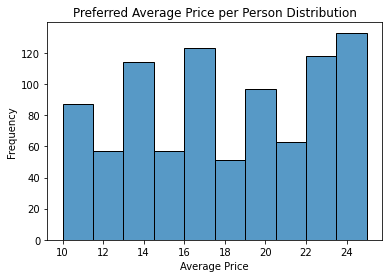

In [8]:
# Create a histogram using Seaborn
sns.histplot(client_data['price_range'], bins=10)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Preferred Average Price per Person Distribution')

# Display the histogram
plt.show()

In [9]:
import random
def normally_distributed_prices(price):
    if random.random() < 0.5:
        price = random.randint(12, 21)
    else:
        if random.random() > 0.9:
            price = random.randint(21, 40)

    return price

In [10]:
client_data['normal_price_range'] = client_data['price_range'].apply(normally_distributed_prices)

In [11]:
client_data['normal_price_range'].fillna(random.randint(12, 31), inplace=True)

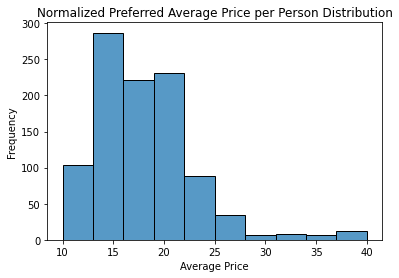

In [12]:
# Create a histogram using Seaborn
sns.histplot(client_data['normal_price_range'], bins=10)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Normalized Preferred Average Price per Person Distribution')

# Display the histogram
plt.show()

#### Gender

In [13]:
client_data['gender'].fillna('Other', inplace=True)

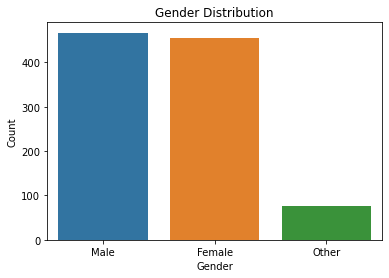

In [14]:
sns.countplot(data=client_data, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [15]:
def n_gender(observation):
    if (observation['gender'] == 'Other') and (observation['date_of_birth'] < pd.to_datetime('31/12/1983', format= '%d/%M/%Y')):
        return random.choice(['Male', 'Female'])
    else:
        return observation['gender']

In [16]:
client_data['gender'] = client_data.apply(lambda x: n_gender(x), axis=1)

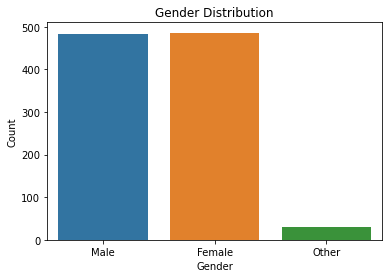

In [17]:
sns.countplot(data=client_data, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

#### Smokers and Alcohol

In [18]:
client_data['smoker'].fillna(False, inplace=True)

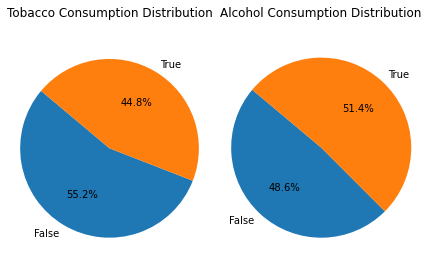

In [19]:
# Count the values in the "gender" variable
smoker_counts = client_data['smoker'].value_counts()
alcohol_counts = client_data['drinks_alcohol'].value_counts(ascending=True)

# First subplot for smoker distribution
plt.subplot(1, 2, 1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Tobacco Consumption Distribution")

# Second subplot for alcohol distribution
plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Alcohol Consumption Distribution")

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

The data from the Portuguese National Health Survey from 2019 finds that only 17% of the portuguese population is a smoker - thus, we will try to reshape our distribution to match these statistics more accordingly. Also in the afore mentioned report, it is stated that approximately 70% of Portugal's residents have consumed at least one alcoholic beverage within a year time span. For this reason, it seems that the current distribution of people who drink alcohol seems sensible. The missing values of the latter were inputed with "True".

In [20]:
def adjust_smoking(observation, percentage):
    if observation == True and random.random() < percentage:
        return False
    else:
        return observation

In [21]:
client_data['smoker_n'] = client_data['smoker'].apply(lambda x: adjust_smoking(x, 0.65))

In [22]:
client_data['drinks_alcohol'].fillna(True, inplace=True)

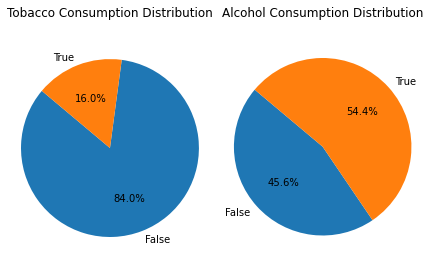

In [23]:
# Count the values in the "gender" variable
smoker_counts = client_data['smoker_n'].value_counts()
alcohol_counts = client_data['drinks_alcohol'].value_counts(ascending=True)

# First subplot for smoker distribution
plt.subplot(1, 2, 1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Tobacco Consumption Distribution")

# Second subplot for alcohol distribution
plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Alcohol Consumption Distribution")

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

#### Date of Birth and Age

In [24]:
current_date = datetime.datetime.now()
client_data['age'] = (current_date - client_data['date_of_birth']).astype('<m8[Y]')

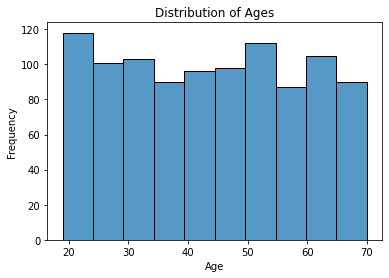

In [25]:
# Create a histogram using Seaborn
sns.histplot(client_data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

# Display the histogram
plt.show()

### Other remaining missing values

In [26]:
def fill_randomly(observation, options):
    if pd.isna(observation):  # Check for NaN (missing) values
        return random.choice(options)
    else:
        return observation


In [27]:
unique_cities_without_nan = [city for city in list(client_data['city'].unique()) if not pd.isna(city)]
client_data['city'] = client_data['city'].apply(lambda x: fill_randomly(x, unique_cities_without_nan))

In [28]:
client_data['nationality'] = client_data['nationality'].apply(lambda x: fill_randomly(x, ['Portuguese', 'Brazillian', 'American', 'British']))

In [29]:
client_data['preferred_payment'] = client_data['preferred_payment'].apply(lambda x: fill_randomly(x, ['MBWay', 'Cash', 'Credit Card', 'Visa', 'Paypal']))

In [30]:
client_data.drop(columns=['age', 'smoker', 'price_range'], axis=1, inplace=True)

#### Adding our own entries

In [31]:
client_data

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,travel_car,drinks_alcohol,...,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,cuisine_type,lunch_hour,dinner_hour,normal_price_range,smoker_n
id,,,,,,,,,,,,,,,,,,,,,
1,Örjan,Douberday,wdouberday0@google.com.br,Male,mdouberday0,1961-01-17 00:12:00,Portuguese,Setúbal,False,False,...,arroz de pato,sopa de tomate,mindful,MBWay,familiar,seafood,13:00 - 14:00,19:00 - 20:00,20.0,False
2,Céline,Milmo,lmilmo1@naver.com,Male,lmilmo1,1986-01-02 00:11:00,Portuguese,Setúbal,True,False,...,cheesecake,bitoque,mindful,Cash,after work,portuguese,13:00 - 14:00,21:00 - 22:00,13.0,False
3,Bérénice,McCaughey,jmccaughey2@blogs.com,Male,kmccaughey2,1991-01-10 00:05:00,Portuguese,Porto,True,True,...,pasta,arroz de pato,foodie,Credit Card,after work,mediterranean,12 :00 - 13:00,18 :00 - 19:00,13.0,False
4,Gaëlle,O'Hickey,gohickey3@biblegateway.com,Male,kohickey3,1974-01-21 00:10:00,Portuguese,Coimbra,False,True,...,filetes de pescada,ceviche,foodie,MBWay,after work,portuguese,13:00 - 14:00,20:00 - 21:00,13.0,True
5,Yáo,O'Sheilds,aosheilds4@pbs.org,Female,hosheilds4,1969-01-05 00:01:00,Portuguese,Leiria,False,True,...,tacos,salada de frutas,social,MBWay,homemade,meat cuisine,13:00 - 14:00,19:00 - 20:00,19.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Liè,De Vaar,adevaarrn@4shared.com,Female,ddevaarrn,1981-01-23 00:06:00,Portuguese,Aveiro,False,True,...,feijoada,coelho,social,Credit Card,after work,international,13:00 - 14:00,19:00 - 20:00,15.0,False
997,Vérane,Rayner,mraynerro@icio.us,Male,braynerro,1977-01-06 00:04:00,Portuguese,Castelo Branco,False,False,...,bacalhau a gomes de sa,pasta,social,MBWay,homemade,mediterranean,14:00 - 15:00,19:00 - 20:00,18.0,True
998,Jú,Boyd,rboydrp@github.com,Male,sboydrp,1970-01-16 00:09:00,Portuguese,Faro,True,False,...,pimentos,croissant,comfort,Credit Card,traditional,mediterranean,12 :00 - 13:00,19:00 - 20:00,13.0,False


In [32]:
new_entry = {
    'first_name': 'Carolina',
    'last_name': 'Shaul',
    'email': 'carols@gmail.com',
    'gender': 'Female',
    'username': 'shaulleo',
    'date_of_birth': '03/02/2003',
    'nationality': 'Portuguese',
    'city': 'Lisbon',
    'travel_car': False,
    'drinks_alcohol': True,
    'dietary_restrictions': 'none',
    'smoker_n': True, 
    'allergies': 'none',
    'preferred_payment': 'Credit Card',
    'normal_price_range': 15,
    'favourite_food': 'salmão',
    'dislike_food': 'favas',
    'personality': 'adventurous',
    'restaurant_style': 'familiar',
    'cuisine_type': 'italian',
    'lunch_hour': '13:00 - 14:00',
    'dinner_hour': '21:00 - 22:00'
}

In [45]:
client_data = client_data.append(pd.DataFrame([new_entry]), ignore_index=True)

In [250]:
client_data.to_csv('data/clientDataClean.csv')